## Analysis of StackOvewFlow Data for Blogpost

In this assignment I have chosen to have a look a little more closely at job satisfaction and which factors that might influence it to be able to find measures in order to increase job satisfaction for my teams as an engineering manager. 

1.) In which countries are the developers most happy?

2.) Does the provided equipment seem to influence the job satisfaction?

3.) Are developers that are able to invest a lot of time in improving their tooling more happy than the average developers?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from IPython.core.display import HTML

%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df_desc = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ill start by having a look at the data and which information is availablle to answer my questions. 

In [30]:
display(HTML(df_desc.to_html()))

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to open source projects?
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,EmploymentStatus,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you've completed?
7,MajorUndergrad,Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large is the company or organization you work for?"


For my first questions Contry and Jobsatisfaction should be able to give me a good insight. For the second question  EquipmentSatisfiedXXXX can be used. For the last question InvestTimeTools is the column that I need. 

In [3]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


The following chart shows the distirbution of jobsatisfaction among the individuals that have indicated a job satisfaction. In general is can be seen that more than 50% of all individuals have said that they are satisfied with their jobs. 

((array([ 467.,  373.,  888., 1635., 1865., 3749., 4726., 7969., 8983.,
         9721.]),
  array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
  <a list of 10 Patch objects>),)

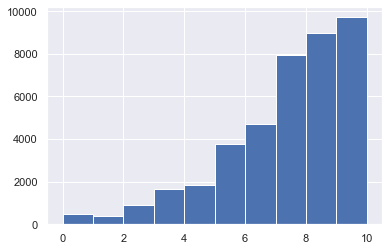

In [14]:
plt.hist(df['JobSatisfaction']),


# Question 1: In which countries are the developers most happy?

In order to get statistically relevant answers that are not biased by the oppinion by single individuals I have chosen to limit my analysis to countries where more than 200 answers are available.

In [37]:
display(HTML(pd.DataFrame(df['Country'].value_counts()).to_html()))

,Country
United States,11455
India,5197
United Kingdom,4395
Germany,4143
Canada,2233
France,1740
Poland,1290
Australia,913
Russian Federation,873
Spain,864


In [42]:
df['Country'].value_counts()/df.shape[0] - sum(df['Country'].isnull())

United States               0.222895
India                       0.101125
United Kingdom              0.085519
Germany                     0.080616
Canada                      0.043450
                              ...   
Northern Mariana Islands    0.000019
Montserrat                  0.000019
Comoros                     0.000019
Cook Islands                0.000019
Pitcairn Island             0.000019
Name: Country, Length: 201, dtype: float64

Filter the data to use the countries with more than 200 respondents. 

In [120]:
possible_vals = ["United States", 
                 "India",
                 "United Kingdom",
                 "Germany",
                 "Canada",
                 "France",
                 "Poland",
                 "Australia",
                 "Russian Federation",
                 "Spain",
                 "Netherlands",
                 "Italy",
                 "Brazil",
                 "Sweden",
                 "Switzerland",
                 "Israel",
                 "Romania",
                 "Iran",
                 "Austria",
                 "Pakistan",
                 "Czech Republic",
                 "Belgium",
                 "South Africa",
                 "Turkey",
                 "Ukraine",
                 "Mexico",
                 "Ireland",
                 "Hungary",
                 "Philippines",
                 "Slovenia",
                 "Denmark",
                 "Greece",
                 "Indonesia",
                 "Finland",
                 "Portugal",
                 "Norway",
                 "Bulgaria",
                 "Argentina",
                 "New Zealand",
                 "Japan",
                 "China", 
                 "Serbia"]


In [121]:
subset_df = df.loc[df['Country'].isin(possible_vals)]

Show the average job satisifaction per country.

In [119]:
display(HTML(pd.DataFrame(subset_df.groupby(['Country']).mean()['JobSatisfaction'].sort_values().dropna()).to_html()))

,JobSatisfaction
Country,
Japan,5.828431
India,6.162005
China,6.429379
Turkey,6.533582
Indonesia,6.581281
Italy,6.586093
Philippines,6.606195
Portugal,6.631841
Pakistan,6.679012


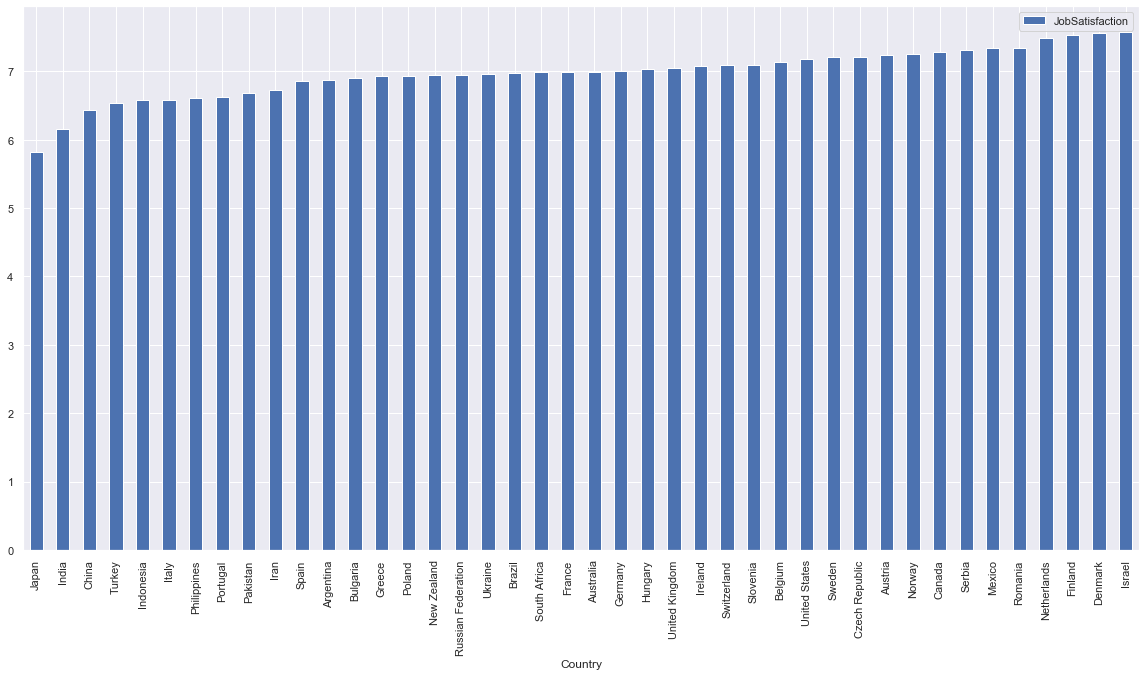

In [134]:
(pd.DataFrame(subset_df.groupby(['Country']).mean()['JobSatisfaction'].sort_values().dropna())).plot.bar(figsize=(20,10))

Conclusion: Israel, Denmark and Finland are the three top countries when it comes to job satisfaction. 

# 2.) Does the provided equipment seem to influence the job satisfaction?

Here I have chosen to have a look at two of the attributes for satisfaction with equipment Monitors and RAM to see if these seem to be connected to job satisfaction. 

In order to to that I will compare the values of all respondent with the values of the respondents with 8 - 10 in job satisfaction. 

In [155]:
df.shape

(51392, 154)

In [91]:
df_high_sat = df[df['JobSatisfaction'] > 7]

In [97]:
df_high_sat.shape

(18704, 154)

In [90]:
df['EquipmentSatisfiedMonitors'].value_counts() / df.shape[0]

Satisfied               0.222136
Very satisfied          0.149498
Somewhat satisfied      0.122217
Not very satisfied      0.064640
Not at all satisfied    0.019906
Name: EquipmentSatisfiedMonitors, dtype: float64

In [92]:
df_high_sat['EquipmentSatisfiedMonitors'].value_counts() / df_high_sat.shape[0]

Satisfied               0.242889
Very satisfied          0.205731
Somewhat satisfied      0.105379
Not very satisfied      0.044055
Not at all satisfied    0.010051
Name: EquipmentSatisfiedMonitors, dtype: float64

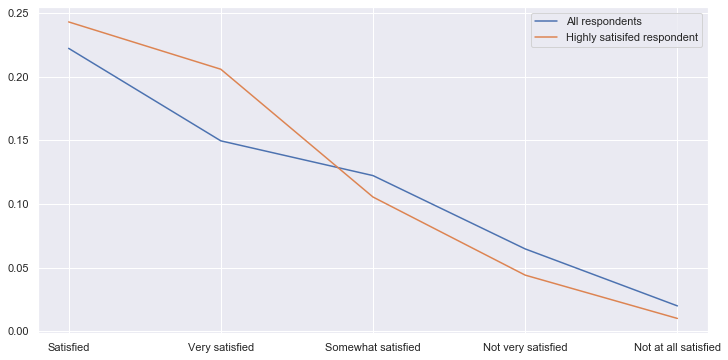

In [181]:
plt.figure(figsize=(12,6))
plt.plot(df['EquipmentSatisfiedMonitors'].value_counts() / df.shape[0])
plt.plot(df_high_sat['EquipmentSatisfiedMonitors'].value_counts() / df_high_sat.shape[0])


plt.legend(['All respondents', 'Highly satisifed respondent'], loc='upper right')
plt.show()


In [96]:
df['EquipmentSatisfiedRAM'].value_counts()/ df.shape[0]

Satisfied               0.226650
Very satisfied          0.158896
Somewhat satisfied      0.111515
Not very satisfied      0.060574
Not at all satisfied    0.020976
Name: EquipmentSatisfiedRAM, dtype: float64

In [95]:
df_high_sat['EquipmentSatisfiedRAM'].value_counts() / df_high_sat.shape[0]

Satisfied               0.246044
Very satisfied          0.208137
Somewhat satisfied      0.096557
Not very satisfied      0.045552
Not at all satisfied    0.012350
Name: EquipmentSatisfiedRAM, dtype: float64

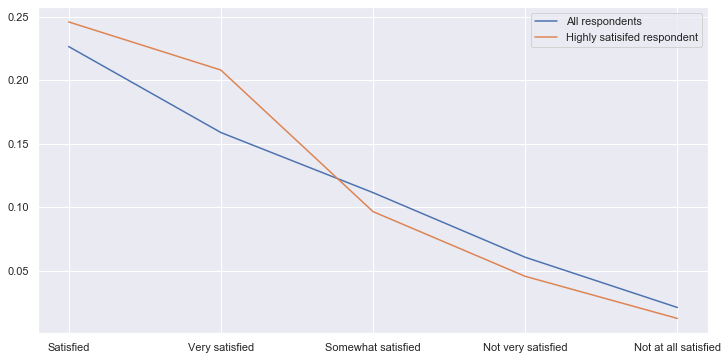

In [180]:
plt.figure(figsize=(12,6))
plt.plot(df['EquipmentSatisfiedRAM'].value_counts() / df.shape[0])
plt.plot(df_high_sat['EquipmentSatisfiedRAM'].value_counts() / df_high_sat.shape[0])

plt.legend(['All respondents', 'Highly satisifed respondent'], loc='upper right')


plt.show()

Conclusion: There is a clear connection that can be seen that individuals with high job satisfaction are also satisfied with their equipment to a higher extent. This is clear indicator for me that for developers having the right hardware is an important parameter for improving or havng high job satisfaction. This reflects my own experience from the teams that I have led in the past. 

# 3.) Are developers that are able to invest a lot of time in improving their tooling more happy than the average?

In [165]:
df['InvestTimeTools'].value_counts()/df.shape[0]

Agree                0.244746
Somewhat agree       0.193804
Strongly agree       0.095054
Disagree             0.062597
Strongly disagree    0.004787
Name: InvestTimeTools, dtype: float64

In [163]:
df_high_sat['InvestTimeTools'].value_counts()/df_high_sat.shape[0]

Agree                0.266093
Somewhat agree       0.194237
Strongly agree       0.105539
Disagree             0.060789
Strongly disagree    0.003154
Name: InvestTimeTools, dtype: float64

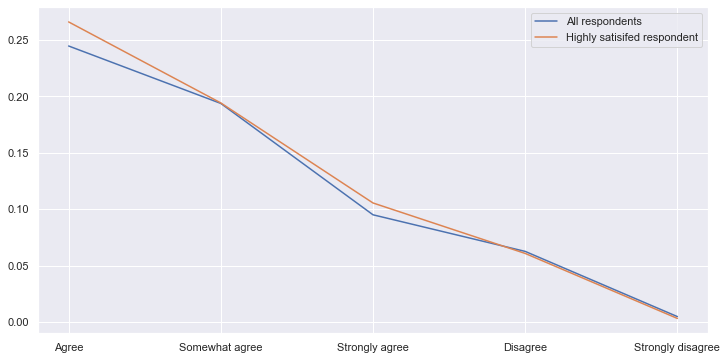

In [179]:
plt.figure(figsize=(12,6))
plt.plot(df['InvestTimeTools'].value_counts()/df.shape[0])
plt.plot(df_high_sat['InvestTimeTools'].value_counts()/df_high_sat.shape[0])

plt.legend(['All respondents', 'Highly satisifed respondent'], loc='upper right')
plt.show()

Conclusion: Also here there is a clear connection be between a higher amout of highly satisfied developers and developers that has answered that the spend a lot of time working on the tooling. Also this is something that I have observed - highly motivated and efficient teams usually are working more on improving their tooling a part of their daily job as other teams. 